In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.duplicated().sum()

np.int64(240)

In [ ]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.2, random_state=42)
X = df.drop('quality', axis=1)
y = df['quality']


In [ ]:
LinearRegression = LinearRegression()
LinearRegression.fit(x_train, y_train)
y_pred = LinearRegression.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.3900251439643166
R-squared Score: 0.40318034127906854


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.30123812499999997
R-squared Score: 0.5390429623873638


Mean Squared Error: 0.60625
R-squared Score: 0.07231130172297862


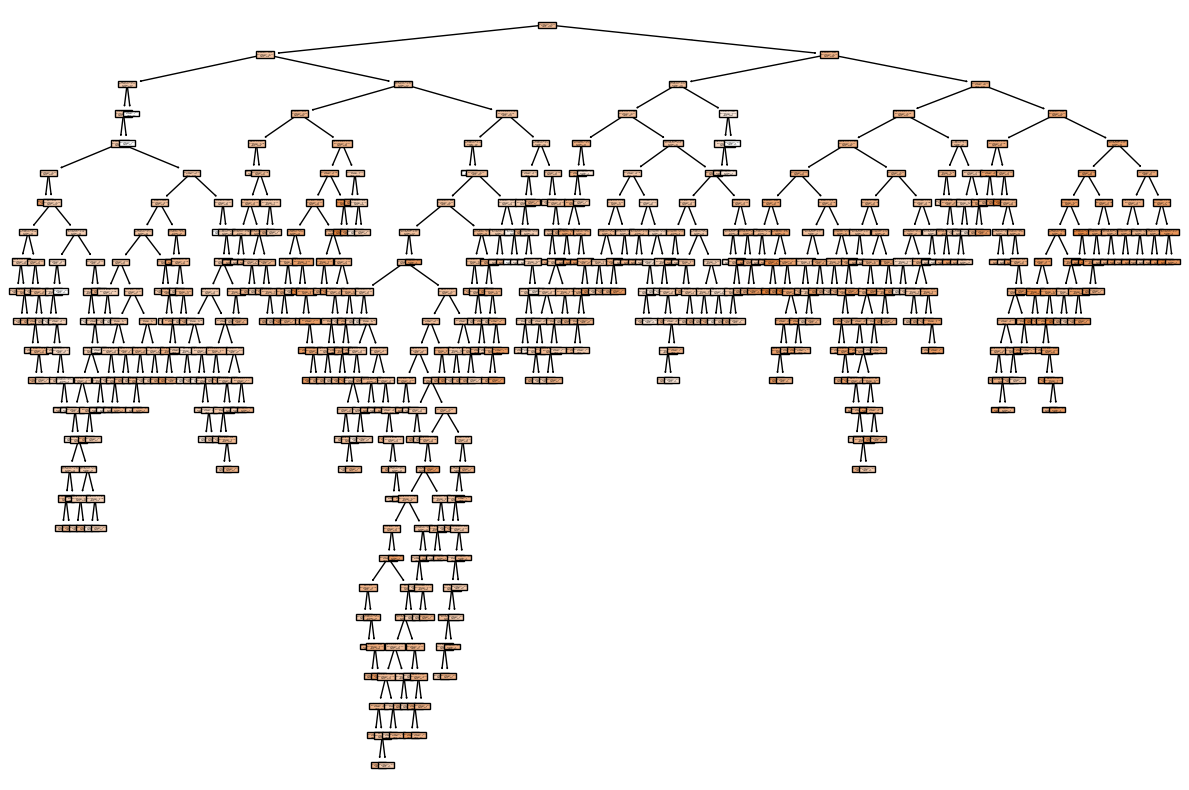

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

Mean Squared Error: 0.3623352320145906
R-squared Score: 0.4455516705525475


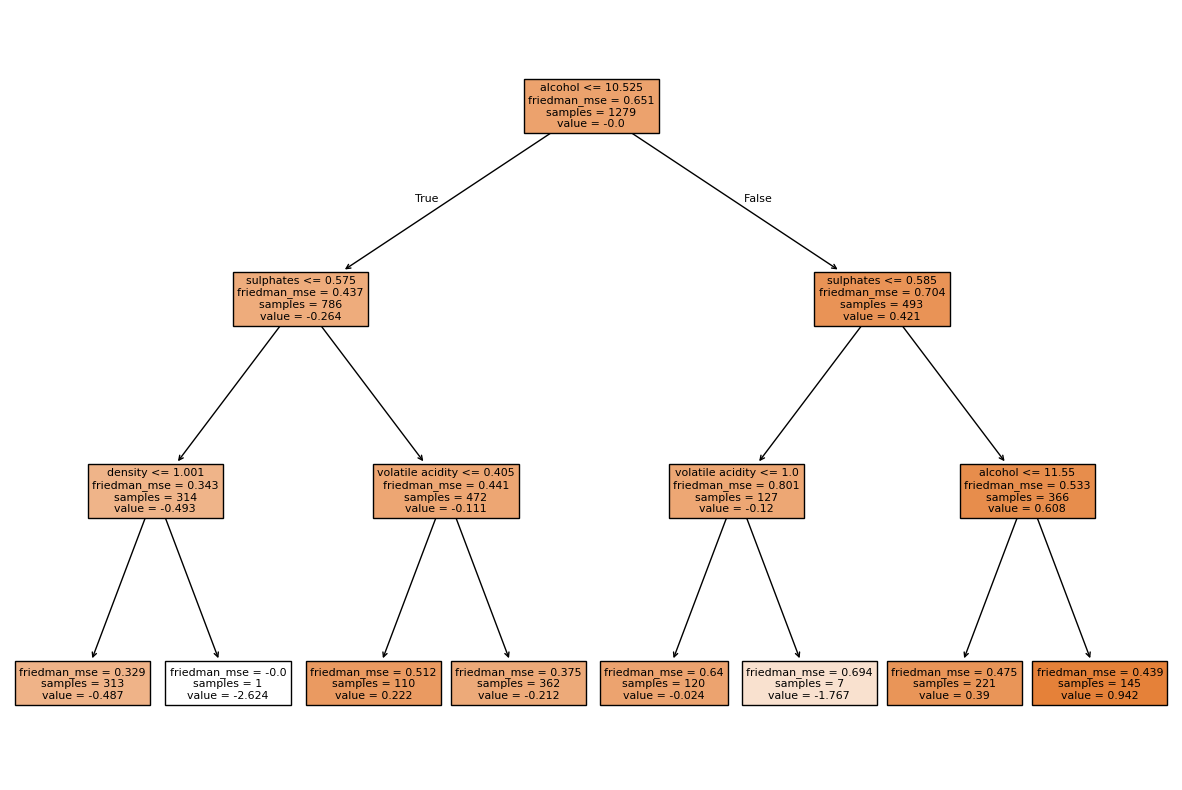

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

SEED = 42
plt.figure(figsize=(15, 10))
plot_tree(gb.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], ax=plt.gca())
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score 5.623925
Mean Squared Error: 0.310977862590854
R-squared Score: 0.5241391364290642


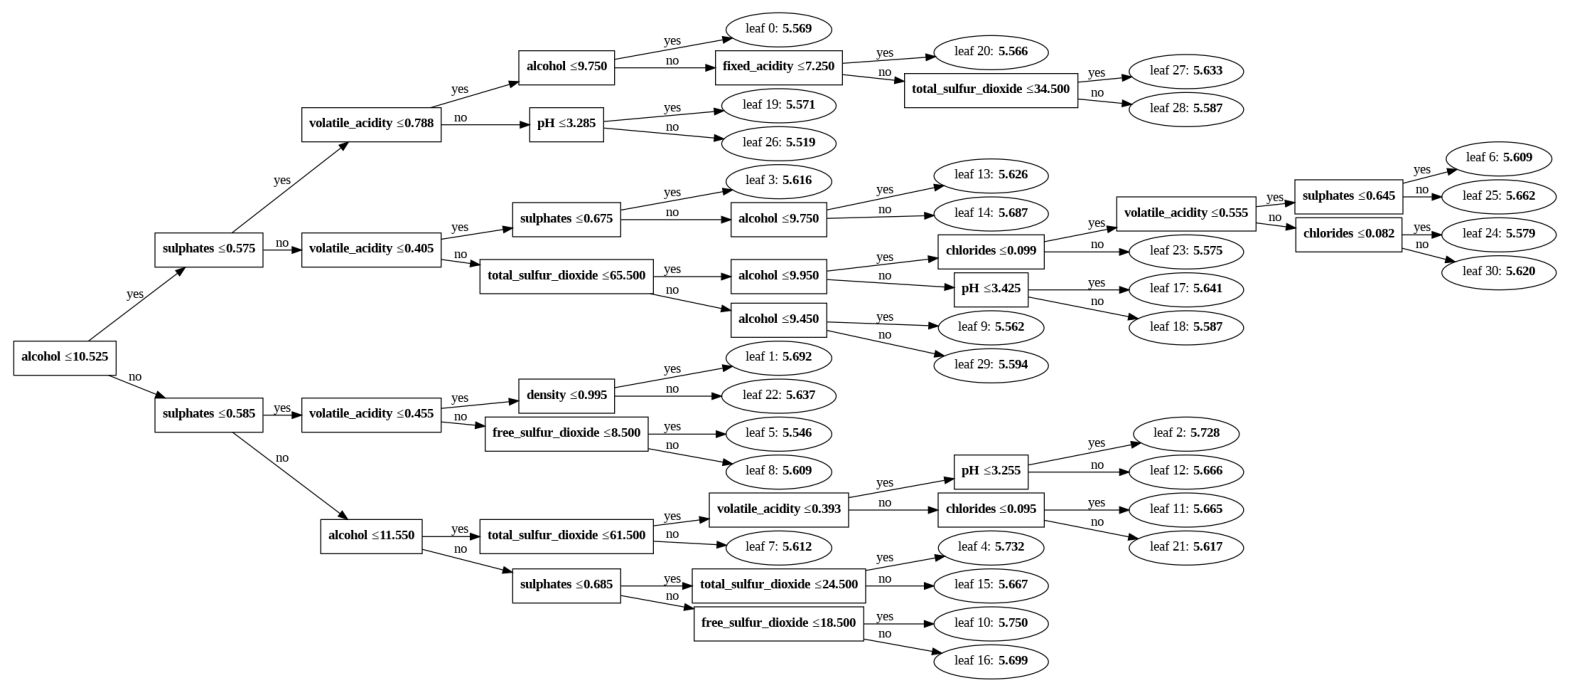

In [ ]:
import lightgbm as lgb
from lightgbm import plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(x_train, y_train)
y_pred = lgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

tree_index = 0
plot_tree(lgb_model, figsize=(20, 20), tree_index=tree_index) # Corrected: Changed 'num_trees' to 'tree_index'
plt.show()

Mean Squared Error: 0.35126441717147827
R-squared Score: 0.4624922275543213


<Figure size 8000x6000 with 0 Axes>

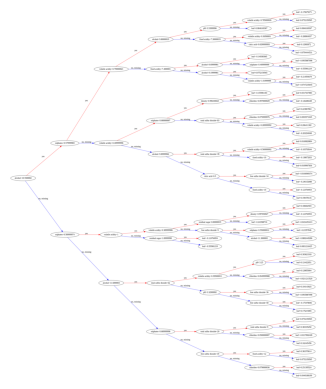

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

tree_index = 0
plt.figure(figsize=(80, 60)) # Even larger figure size for maximum readability
plot_tree(xgb_model, tree_idx=tree_index, rankdir='LR', size='80,60') # Increased size for graphviz
plt.show()

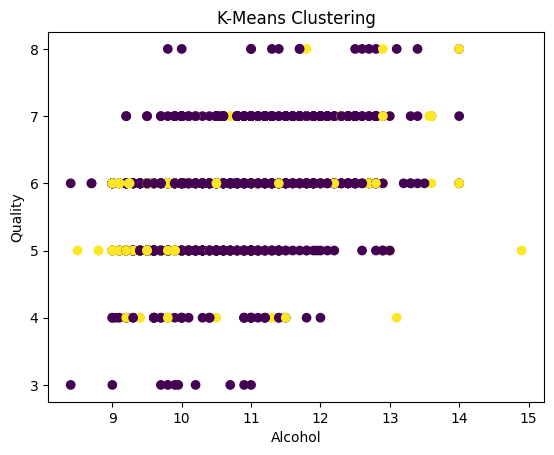

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df.drop('quality', axis=1))
df['cluster'] = kmeans.labels_

plt.scatter(df['alcohol'], df['quality'], c=df['cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.drop('quality', axis=1), df['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6035205248700376


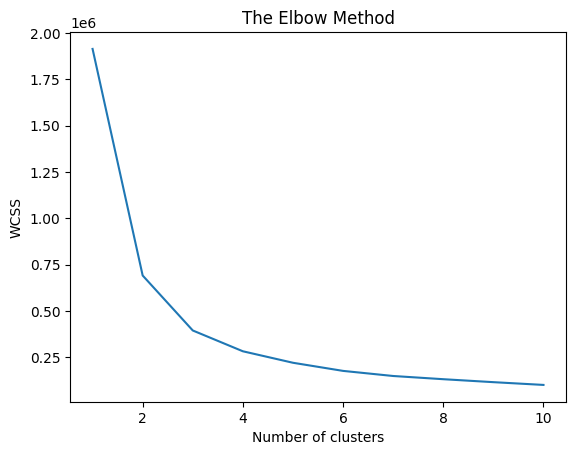

In [ ]:
from sklearn.cluster import k_means

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.drop('quality', axis=1))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.45625
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.49      0.63      0.55       130
           6       0.44      0.45      0.45       132
           7       0.31      0.12      0.17        42
           8       0.00      0.00      0.00         5

    accuracy                           0.46       320
   macro avg       0.21      0.20      0.19       320
weighted avg       0.42      0.46      0.43       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.56875
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.78      0.68       130
           6       0.52      0.61      0.56       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.46      0.57      0.51       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.70625
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.77      0.78      0.78       130
           3       0.67      0.75      0.71       132
           4       0.64      0.60      0.62        42
           5       0.00      0.00      0.00         5

    accuracy                           0.71       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.68      0.71      0.69       320



<Figure size 8000x6000 with 0 Axes>

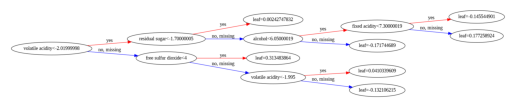

In [ ]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(x_train - 3, y_train - 3)
y_pred = xgb.predict(x_test - 3)

accuracy = accuracy_score(y_test - 3, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test - 3, y_pred, zero_division=0)) # Added zero_division=0

tree_index = 0
plt.figure(figsize=(80, 60)) # Even larger figure size for maximum readability
plot_tree(xgb, tree_idx=tree_index, rankdir='LR') # Corrected parameter name from num_trees to tree_idx and removed redundant size
plt.show()

Accuracy:  0.5572232645403377
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.66      0.65      0.66       681
           6       0.49      0.69      0.57       638
           7       0.35      0.03      0.06       199
           8       0.00      0.00      0.00        18

    accuracy                           0.56      1599
   macro avg       0.25      0.23      0.21      1599
weighted avg       0.52      0.56      0.51      1599



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


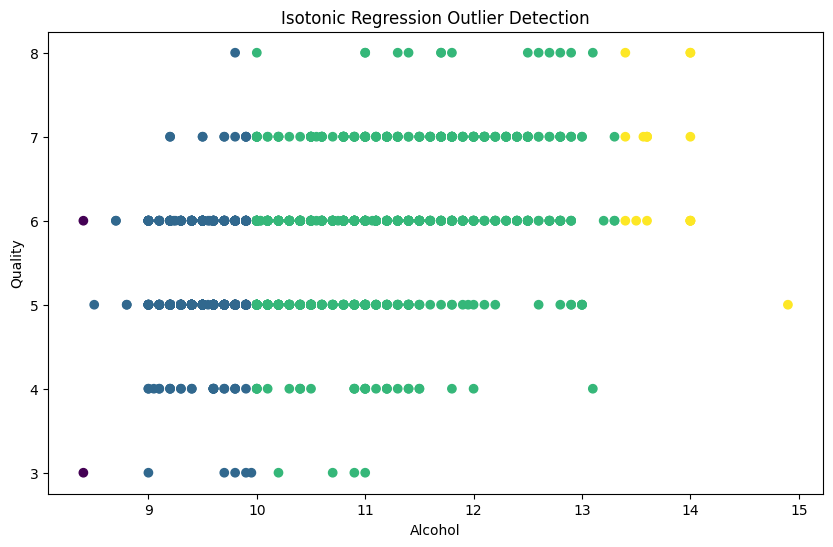

In [ ]:
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import accuracy_score, classification_report

ir = IsotonicRegression()
# Corrected: Passed a single feature ('alcohol') to IsotonicRegression
ir.fit(df['alcohol'], df['quality'])
y_pred = ir.predict(df['alcohol'])
y_pred = np.round(y_pred).astype(int)

accuracy = accuracy_score(df['quality'], y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(df['quality'], y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(df['alcohol'], df['quality'], c=y_pred, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Isotonic Regression Outlier Detection')
plt.show()